In [891]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

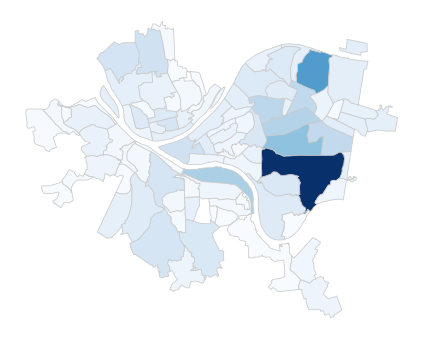

In [892]:
trees = pd.read_csv('Datasets\Trees.csv', low_memory=False)
fname = "Datasets/Neighborhoods.geojson"
pitt_map = gpd.read_file(fname)
pitt_map = pitt_map.rename(columns={'Neighborhood_2010_HOOD' : 'Neighborhood'})
df = pd.DataFrame(data=trees['neighborhood'].value_counts(sort=False))
df = df.rename(columns={'neighborhood' : 'count'}).reset_index()
df = df.rename(columns={'index' : 'neighborhood'})

pitt_map = pitt_map.sort_values(by='Neighborhood').reset_index()
df = df.sort_values(by='neighborhood').reset_index()

frame = [pitt_map,df]
merged = pd.concat(frame, axis=1, ignore_index=False, sort=False)

variable = 'count'
vmin, vmax = 0, 5073
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')

merged.plot(column=variable, cmap='Blues', linewidth=0.8, vmin=vmin , vmax=vmax , ax=ax, edgecolor='0.8')

In [893]:
merged[['neighborhood','count']].sort_values(by='count', ascending=False).head(10)

,neighborhood,count
76,Squirrel Hill South,5073
39,Highland Park,2941
75,Squirrel Hill North,2083
71,South Side Flats,1693
67,Shadyside,1558
9,Bloomfield,1436
28,East Liberty,1366
62,Point Breeze,1316
60,Perry North,1007
16,Central Business District,1002


<AxesSubplot:>

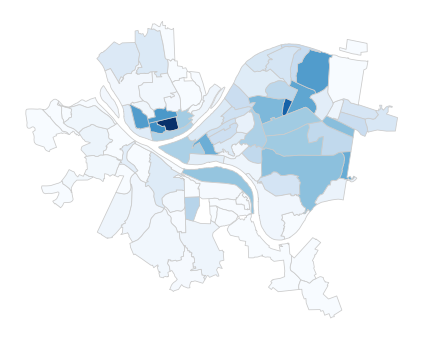

In [894]:
TSK = (merged['count']).div(merged['SHAPE_Area'].mul(100000)).to_frame('Trees per Square Kilometer')
merged2 = pd.concat([merged, TSK], axis=1, ignore_index=False, sort=False)
variable = 'Trees per Square Kilometer'
vmin,vmax = 10, 151
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
merged2.plot(column=variable, cmap='Blues', linewidth=0.8, vmin=vmin , vmax=vmax , ax=ax, edgecolor='0.8')

In [895]:
merged2[['neighborhood','Trees per Square Kilometer']].sort_values(by='Trees per Square Kilometer', ascending=False).head(10)

,neighborhood,Trees per Square Kilometer
0,Allegheny Center,150.7301207180
33,Friendship,123.9533297849
1,Allegheny West,99.3574462319
18,Central Northside,94.6418293689
48,Manchester,92.0522540279
39,Highland Park,91.9362889516
28,East Liberty,85.4603710909
65,Regent Square,82.0977232700
23,Crawford-Roberts,79.9504796373
9,Bloomfield,74.3677166030


<AxesSubplot:>

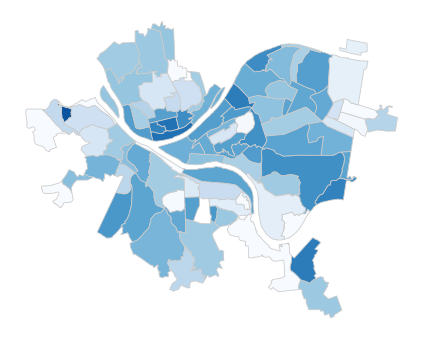

In [896]:
cond_list = []


for x in trees['condition']:
    if x != x:
        cond_list.append(-1)
    elif x == 'Dead':
        cond_list.append(-2)
    elif x == 'Critical':
        cond_list.append(0.2)
    elif x == 'Poor':
        cond_list.append(0.4)
    elif x == 'Fair':
        cond_list.append(0.6)
    elif x == 'Good':
        cond_list.append(1.0)
    elif x == 'Very Good':
        cond_list.append(1.2)
    elif x == 'Excellent':
        cond_list.append(1.4)
    else:
        cond_list.append(x)

cond_val = pd.DataFrame().append(cond_list)
cond_val.columns = ['Tree Health']

tree_merge = pd.concat([trees,cond_val], axis=1, ignore_index=False, sort=False)
tree_health = tree_merge.groupby(by='neighborhood').sum().sort_values('neighborhood', ascending = True)['Tree Health']

tree_health = pd.DataFrame().append(tree_health).transpose()
tree_health = tree_health.reset_index()

merged3 = pd.concat([merged2,tree_health], axis=1, ignore_index=False, sort=False)

count_list = []
health_list = []
calc_list = []

for x in merged3['count']:
    count_list.append(x)
for x in merged3['Tree Health']:
    health_list.append(x)

for x in range(90):
    calc_list.append((((health_list[x]) / (count_list[x]))) * 100)

perc_health = pd.DataFrame().append(calc_list)
perc_health.columns = ['Tree Health Percentage']

merged4 = pd.concat([merged3,perc_health], axis=1, ignore_index=False, sort=False)

variable = 'Tree Health Percentage'
vmin,vmax = 0, 100
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
merged4.plot(column=variable, cmap='Blues', linewidth=0.8, vmin=vmin , vmax=vmax , ax=ax, edgecolor='0.8')

In [903]:
merged4[['neighborhood','Tree Health Percentage']].sort_values(by='Tree Health Percentage', ascending = False).head(10)

,neighborhood,Tree Health Percentage
20,Chartiers City,86.4864864865
56,North Shore,74.6608315098
0,Allegheny Center,74.6482122261
54,New Homestead,70.7103825137
47,Lower Lawrenceville,70.5905511811
81,Swisshelm Park,68.5714285714
1,Allegheny West,68.1865284974
25,East Allegheny,64.2455242967
85,Upper Lawrenceville,64.0750670241
76,Squirrel Hill South,63.1539522965


<AxesSubplot:>

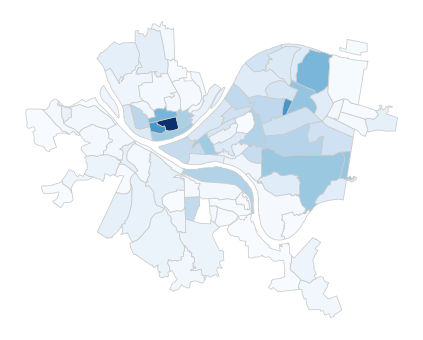

In [897]:
HTSK = (merged4['Tree Health']).div(merged4['SHAPE_Area'].mul(100000)).to_frame('Health of Trees per Square Kilometer')

merged5 = pd.concat([merged4, HTSK], axis=1, ignore_index=False, sort=False)
variable = 'Health of Trees per Square Kilometer'
vmin,vmax = 0, 113
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
merged5.plot(column=variable, cmap='Blues', linewidth=0.8, vmin=vmin , vmax=vmax , ax=ax, edgecolor='0.8')

In [904]:
merged5[['neighborhood','Health of Trees per Square Kilometer']].sort_values(by='Health of Trees per Square Kilometer',ascending = False).head(10)

,neighborhood,Health of Trees per Square Kilometer
0,Allegheny Center,112.5173404022
33,Friendship,68.0031251251
1,Allegheny West,67.7483933892
18,Central Northside,53.1903931231
39,Highland Park,52.1232805841
28,East Liberty,45.4579104207
65,Regent Square,44.5673354894
76,Squirrel Hill South,43.6289910920
23,Crawford-Roberts,41.1013029122
56,North Shore,40.8709186927


Allegheny Center is the best neighborhood based on The health of its trees, and the number of trees per square kilometer.